# Silhoutte score: Selecting the number of clusters

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import cluster

### 1. Use 'Annual spending.csv'. Standardize the variables.

In [2]:
df = pd.read_csv('Annual spending.csv')
df.head()

,income,age,days_since_buy,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [3]:
col = df.columns  
for c in col:
    df['z_'+c] = (df[c] - df[c].mean())/df[c].std()
    df['z_'+c]=preprocessing.scale(df[c])  # alternative
    
df.head()

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129


- `col = df.columns`: Retrieves all the column names from the DataFrame df and stores them in the variable col.
- `for c in col`: Iterates over each column name in the DataFrame.
    - `df['z_'+c] = (df[c] - df[c].mean())/df[c].std()`: For each column, this line computes the z-score, which standardizes the data points. The standardized values for each column c are calculated by subtracting the mean and dividing by the standard deviation. The results are stored in new columns with names formed by prefixing the original names with 'z_'.

### 2. Use the Silhoutte score method to select the number of clusters

Silhouette Score: (2, 0.39766635502349)
Silhouette Score: (3, 0.43678441648152466)
Silhouette Score: (4, 0.4444649277848981)
Silhouette Score: (5, 0.4731327191810766)
Silhouette Score: (6, 0.3961300672367258)
Silhouette Score: (7, 0.32709252160811514)
Silhouette Score: (8, 0.26380055844457523)
Silhouette Score: (9, 0.2236349135196424)
Silhouette Score: (10, 0.23112978675860096)


Text(0, 0.5, 'Average Silhouette Score')

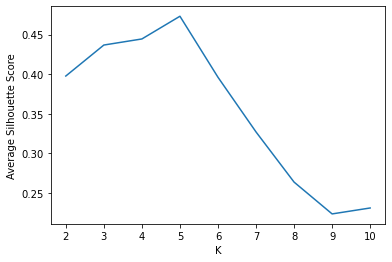

In [4]:
x = df[['z_income', 'z_age', 'z_days_since_buy', 'z_annual_spend']]
x = df.iloc[:, 4:]  # alternative: all rows and columns 5~end

krange = range(2,11)  # 2~10
silhou = []
for i in krange:
    m = cluster.KMeans(n_clusters=i)
    pred = m.fit_predict(x)  # fit and predict cluster
    score = metrics.silhouette_score(x, pred)  # (x, predicted cluster)
    silhou.append(score)
    print('Silhouette Score:', (i, score))
     # print('Silhouette Score for %i Clusters: %0.4f' % (i, score))  # 4 decimal points

plt.plot(krange, silhou)
plt.xlabel('K')
plt.ylabel('Average Silhouette Score')

- `krange = range(2,11)` defines a range of values from 2 to 10, representing the number of clusters to test.
- `range()` function generates a sequence of numbers. It can take one, two, or three arguments, `range(start(inclusive), stop(exclusive), step)`
    - `range(stop)` generates numbers from 0 up to (but not including) the `stop` value, with a step size 1.
        - `range(5)` = 0, 1, 2, 3, 4
    - `range(start, stop)` generates numbers from `start` up to (but not including) the `stop` value, with a step size of 1.
        - `range(2, 8)` = 2, 3, 4, 5, 6, 7.
    - `range(start, stop, step)` generates numbers fr
- `m = cluster.KMeans(n_clusters=i)` creates a k-means clustering model with i clusters.
- `pred = m.fit_predict(x)` fits the model and assigns each data point to a cluster, returning the cluster indices.
- `score = metrics.silhouette_score(x, pred)` calculates the silhouette score for the current clustering, providing a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 (incorrect clustering) to +1 (highly dense clustering).
- `silhou.append(score)` adds the silhouette score to the list silhou.
- `plt.plot(krange, silhou)` plots the silhouette scores, allowing visual identification of the optimal number of clusters.

- K=5 is the optimal solution

### 3. Conduct k-means clustering using the best number of clusters you found

In [5]:
m = cluster.KMeans(n_clusters=5)
m.fit_predict(x)

silhou = metrics.silhouette_score(x, m.labels_)  # (x, cluster)
print('Silhouette score', silhou)

Silhouette score 0.4731327191810766


- `m.labels_`: returns the cluster labels generated by the k-means model m.

In [6]:
df['cluster'] = m.labels_  # Add cluster to df
df.head()

,income,age,days_since_buy,annual_spend,z_income,z_age,z_days_since_buy,z_annual_spend,cluster
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276,3
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939,3
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182,4
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353,4
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129,1


- `df['cluster'] = m.labels_`: This line adds a new column to the DataFrame df named 'cluster'. It fills this column with the cluster labels generated by the k-means model m. 

### 4. Split the data into training and test data. Estimate the Silhoutte score method on test data to select the number of clusters

In [7]:
xtrain, xtest = model_selection.train_test_split(x)

- `model_selection.train_test_split(x)`: splits the dataset into random train and test subsets. By default, it allocates 75% of the data to the training set and the remaining 25% to the test set. 
- `xtrain, xtest`: These are the two subsets returned by the train_test_split function. xtrain contains the portion of the data used for training the model, and xtest contains the portion used for evaluating the model.

Silhouette Score for 2 Clusters: 0.3822
Silhouette Score for 3 Clusters: 0.4280
Silhouette Score for 4 Clusters: 0.4583
Silhouette Score for 5 Clusters: 0.4840
Silhouette Score for 6 Clusters: 0.4117
Silhouette Score for 7 Clusters: 0.3061
Silhouette Score for 8 Clusters: 0.2727
Silhouette Score for 9 Clusters: 0.1868
Silhouette Score for 10 Clusters: 0.1407


Text(0, 0.5, 'Average Silhouette Score')

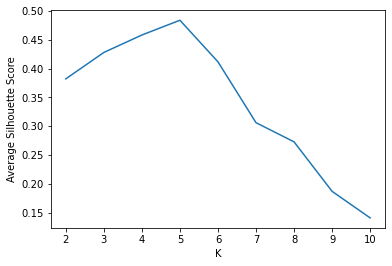

In [8]:
import warnings
warnings.filterwarnings('ignore')  # turn off warnings

krange = range(2,11)
silhou = []
for i in krange:
    m = cluster.KMeans(n_clusters=i).fit(xtrain)
    pred = m.predict(xtest)  # predict cluster
    score = metrics.silhouette_score(xtest, pred)
    silhou.append(score)
    print('Silhouette Score for %i Clusters: %0.4f' % (i, score))
    
plt.plot(krange, silhou)
plt.xlabel('K')
plt.ylabel('Average Silhouette Score')

- `warnings.filterwarnings('ignore')` are used to suppress warnings that might clutter the output.

- K=5 is the optimal solution